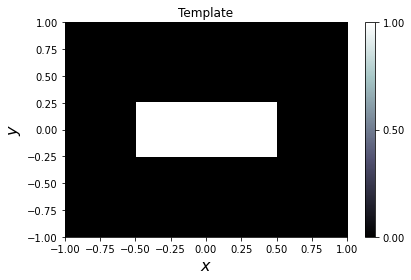

<Figure size 432x288 with 0 Axes>

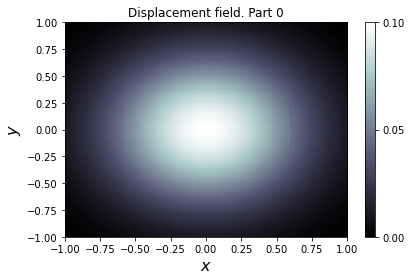

<Figure size 432x288 with 0 Axes>

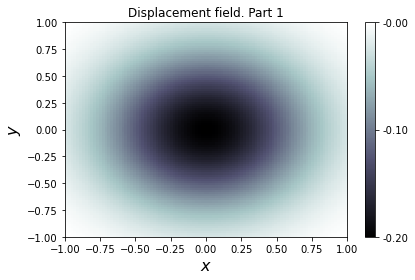

<Figure size 432x288 with 0 Axes>

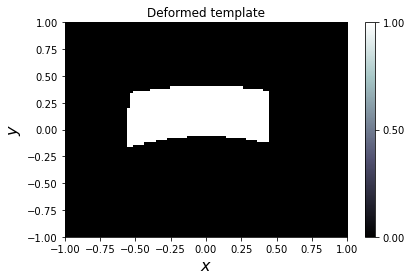

<Figure size 432x288 with 0 Axes>

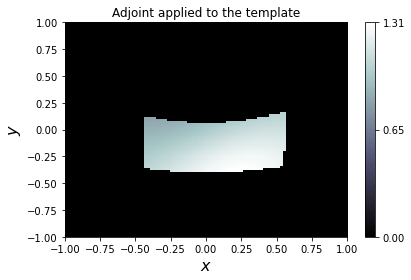

<Figure size 432x288 with 0 Axes>

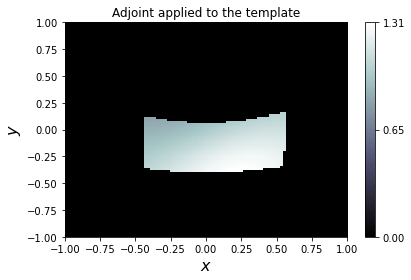

In [6]:
"""Example using the operator of fixed-displacement linearized deformation.
The linearized deformation operator with fixed displacement ``v`` maps
a given template ``I`` to the function ``x --> I(x + v(x))``.
This operator is linear (in ``I``).
This example considers a 2D case, where the displacement field ``v``
is a Gaussian in each component, with positive sign in the first and
negative sign in the second component. Note that in the deformed image,
the value at ``x`` is **taken from** the original image at ``x + v(x)``,
hence the values are moved by ``-v(x)`` when comparing deformed and
original templates.
The adjoint is based on an approximation given by the transformation
``x --> I(x - v(x))``, multiplied by an integral transformation factor
``exp(-div(v))``.
"""

import numpy as np
import odl


# --- Create template and displacement field --- #


# Template space: discretized functions on the rectangle [-1, 1]^2 with
# 100 samples per dimension.
templ_space = odl.uniform_discr([-1, -1], [1, 1], (100, 100))

# The template is a rectangle of size 1.0 x 0.5
template = odl.phantom.cuboid(templ_space, [-0.5, -0.25], [0.5, 0.25])

# Create a product space for displacement field
disp_field_space = templ_space.tangent_bundle

# Define a displacement field that bends the template a bit towards the
# upper left. We use a list of 2 functions and discretize it using the
# disp_field_space.element() method.
sigma = 0.5
disp_func = [
    lambda x: 0.1 * np.exp(-(x[0] ** 2 + x[1] ** 2) / (2 * sigma ** 2)),
    lambda x: -0.2 * np.exp(-(x[0] ** 2 + x[1] ** 2) / (2 * sigma ** 2))]

disp_field = disp_field_space.element(disp_func)

# Show template and displacement field
template.show('Template')
disp_field.show('Displacement field')


# --- Apply LinDeformFixedDisp and its adjoint --- #


# Initialize the deformation operator with fixed displacement
deform_op = odl.deform.LinDeformFixedDisp(disp_field)

# Apply the deformation operator to get the deformed template.
deformed_template = deform_op(template)

# Evaluate the adjoint at the same template.
adj_result = deform_op.adjoint(template)

# Show results
deformed_template.show('Deformed template')
adj_result.show('Adjoint applied to the template', force_show=True)

In [3]:
deformed_template

uniform_discr([-1., -1.], [ 1.,  1.], (100, 100)).element(
    [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
     [ 0.,  0.,  0., ...,  0.,  0.,  0.],
     [ 0.,  0.,  0., ...,  0.,  0.,  0.],
     ..., 
     [ 0.,  0.,  0., ...,  0.,  0.,  0.],
     [ 0.,  0.,  0., ...,  0.,  0.,  0.],
     [ 0.,  0.,  0., ...,  0.,  0.,  0.]]
)

In [9]:
"""Example using the operator of fixed-template linearized deformation.
The linearized deformation operator with fixed template (image) ``I`` maps
a given displacement field ``v`` to the function ``x --> I(x + v(x))``.
This example consider a 2D case, where the displacement field ``v``
is a Gaussian in each component, with positive sign in the first and
negative sign in the second component. Note that in the deformed image,
the value at ``x`` is **taken from** the original image at ``x + v(x)``,
hence the values are moved by ``-v(x)`` when comparing deformed and
original templates.
The derivative and its adjoint are based on the deformation of the
gradient of the template, hence the result is expected to be some kind of
edge image or "edge vector field", respectively.
"""

import numpy as np

import odl

# --- Create template and displacement field --- #


# Template space: discretized functions on the rectangle [-1, 1]^2 with
# 100 samples per dimension.
templ_space = odl.uniform_discr([-1, -1], [1, 1], (100, 100))

# The template is a rectangle of size 1.0 x 0.5
template = odl.phantom.cuboid(templ_space, [-0.5, -0.25], [0.5, 0.25])

# Create a product space for displacement field
disp_field_space = templ_space.tangent_bundle

# Define a displacement field that bends the template a bit towards the
# upper left. We use a list of 2 functions and discretize it using the
# disp_field_space.element() method.

deformations = np.zeros((10,template.shape[0], template.shape[1]))

for i in range(10): 
    amount = 0.1*i

    sigma = 0.5
    disp_func = [
        lambda x: amount * np.exp(-(x[0] ** 2 + x[1] ** 2) / (2 * sigma ** 2)),
        lambda x: -amount * np.exp(-(x[0] ** 2 + x[1] ** 2) / (2 * sigma ** 2))]

    disp_field = disp_field_space.element(disp_func)

    # Show template and displacement field
    #template.show('Template')
    #disp_field.show('Displacement field')


    # --- Apply LinDeformFixedTempl, derivative and its adjoint --- #


    # Initialize the deformation operator with fixed template
    deform_op = odl.deform.LinDeformFixedTempl(template)

    # Apply the deformation operator to get the deformed template.
    deformed_template = deform_op(disp_field)

    # Initialize the derivative of the deformation operator at the
    # given displacement field. The result is again an operator.
    deform_op_deriv = deform_op.derivative(disp_field)

    # Evaluate the derivative at the vector field that has value 1 everywhere,
    # i.e. the global shift by (-1, -1).
    deriv_result = deform_op_deriv(disp_field_space.one())

    # Evaluate the adjoint of derivative at the image that is 1 everywhere.
    deriv_adj_result = deform_op_deriv.adjoint(templ_space.one())

    # Show results
    #deformed_template.show('Deformed template')
    #deriv_result.show('Operator derivative applied to one()')
    #deriv_adj_result.show('Adjoint of the derivative applied to one()',
    #                      force_show=True)
    
    deformations[i]=deformed_template
    

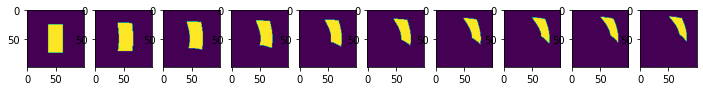

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,10, figsize=(12,18))

for i in range(10):
    ax[i].imshow(deformations[i])



In [13]:
5%5

0